# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

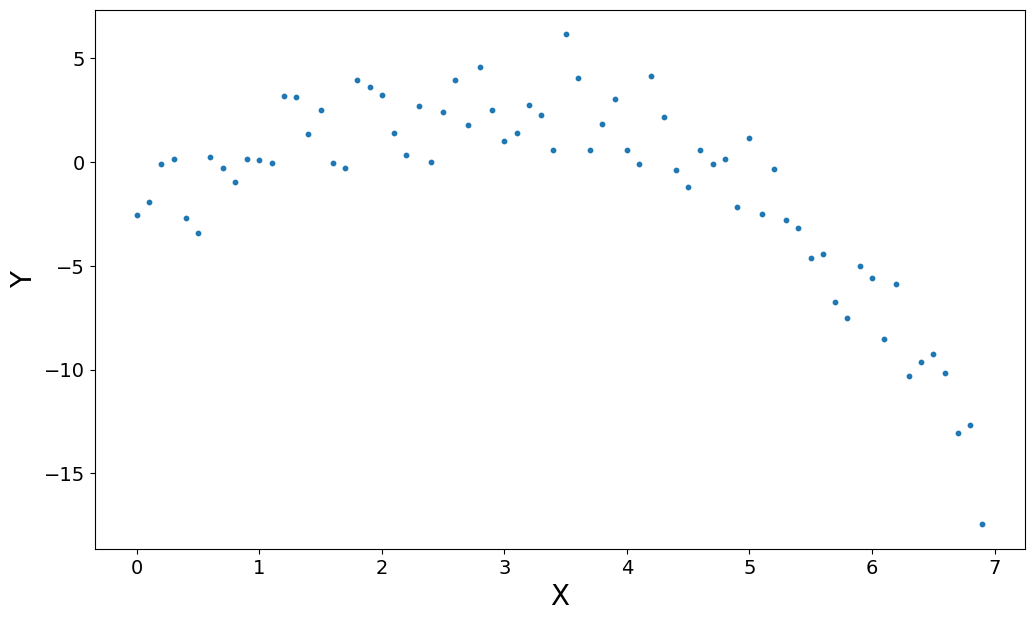

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0]      # First column of array (indexed by 0) contains the dates 
y = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('Exercise-1-1.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

We can only fit a polynomial of maximum (N-1) to the curve. Otherwise, we can always find a polynomial that can pass every data points exactly, which is overfited.

In [ ]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the coefficient vector beta, the fit, and the vector of residuals

    # make sure order is smaller or equal to N-1
    if k >= np.shape(data_matrix)[0]:
        order = np.shape(data_matrix)[0] - 1
    else:
        order = k
    
    # give a matrix contains one column of ones
    x = data_matrix[:,0]
    y = data_matrix[:,1]
    all_ones = np.ones(np.shape(x))
    X = all_ones

    # insert extra column to matrix
    for i in range(order):
        new_column = x**(i+1)
        X = np.column_stack((X,new_column))

    # Computing the coefficient vector beta* using least squares formula
    if order == 0:
        # when order == 0, this is a special case. We have to reshape X, because input to lstsq must be a 2-dimension matrix.
        #for order == 0, a 1-dimension matrix is given somewhere
        X = X.reshape(-1,1)
    beta = np.linalg.lstsq(X, y, rcond=None)[0]  

    # Computing fit data
    fit = X.dot(beta)

    # Computing 
    residuals = y - fit

    # return values
    return beta, fit, residuals



    
    
    

    

Use the tests below to check the outputs of the function you have written:

In [80]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

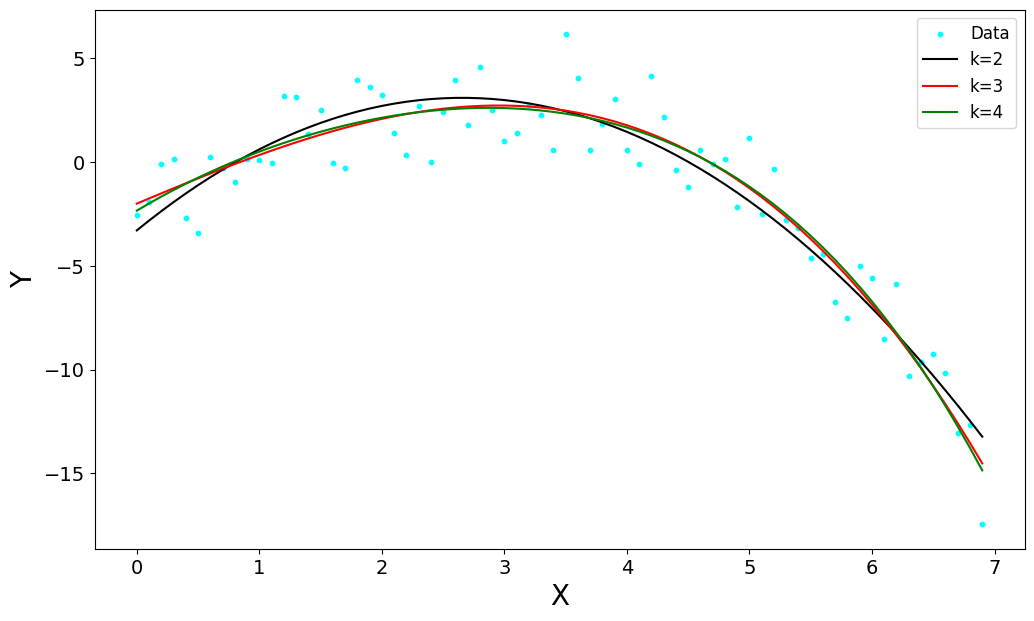

SSE for k = 2 is:  172.181
R_2 for k = 2 is:  0.8876
SSE for k = 3 is:  152.4058
R_2 for k = 3 is:  0.9005
SSE for k = 4 is:  151.2278
R_2 for k = 4 is:  0.9013


In [ ]:
#Your code here

#plot graph
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, y, s=10, color = 'cyan', label = 'Data')   
plt.plot(x, polyreg(xy_data, 2)[1], color = 'black', label = 'k=2')
plt.plot(x, polyreg(xy_data, 3)[1], color = 'red', label = 'k=3')
plt.plot(x, polyreg(xy_data, 4)[1], color = 'green', label = 'k=4')  
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(fontsize = 'large')
plt.savefig('Exercise-1-2.pdf', bbox_inches = 'tight')
plt.show()

#calculate SSE and R_2
SSE_0 = np.round(np.linalg.norm(polyreg(xy_data, 0)[2])**2,decimals = 4)
SSE_2 = np.round(np.linalg.norm(polyreg(xy_data, 2)[2])**2,decimals = 4)
SSE_3 = np.round(np.linalg.norm(polyreg(xy_data, 3)[2])**2,decimals = 4)
SSE_4 = np.round(np.linalg.norm(polyreg(xy_data, 4)[2])**2,decimals = 4)
R_2_2 = np.round(1- SSE_2/SSE_0, decimals = 4)
R_2_3 = np.round(1- SSE_3/SSE_0, decimals = 4)
R_2_4 = np.round(1- SSE_4/SSE_0, decimals = 4)
print("SSE for k = 2 is: ", SSE_2)
print("R_2 for k = 2 is: ", R_2_2)
print("SSE for k = 3 is: ", SSE_3)
print("R_2 for k = 3 is: ", R_2_3)
print("SSE for k = 4 is: ", SSE_4)
print("R_2 for k = 4 is: ", R_2_4)

 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>
 
 

From the value of SSE and R_2, I would like to choose k=4 because it has smallest SSE and largest R_2.

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

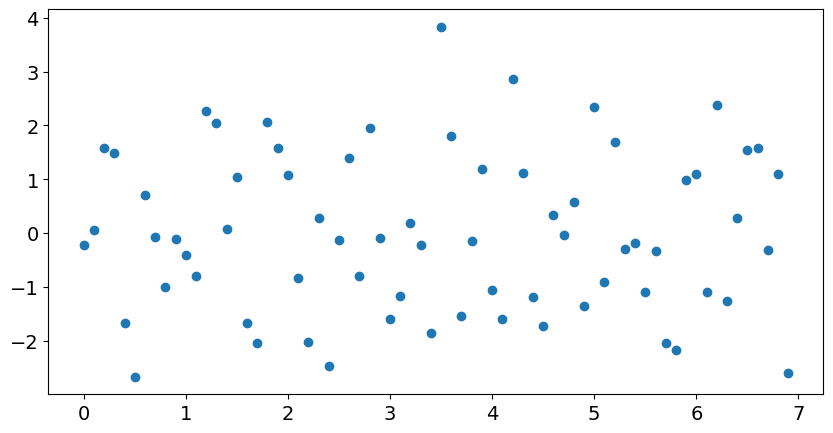

In [ ]:
#Your code here
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, polyreg(xy_data, 4)[2])
plt.show()

Mean of residuals =  -0.0 Variance of residuals =  2.16


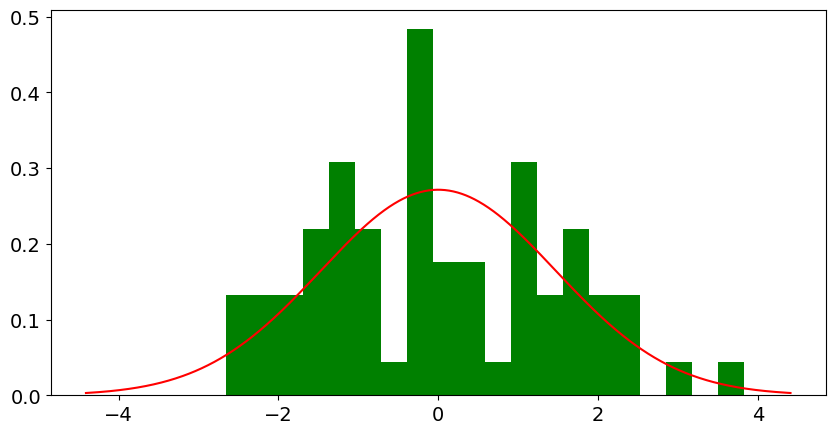

In [91]:
print('Mean of residuals = ', np.round(np.mean(polyreg(xy_data, 4)[2]), 5), 'Variance of residuals = ', 
      np.round(np.var(polyreg(xy_data, 4)[2]), 3))

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(polyreg(xy_data, 4)[2], bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(polyreg(xy_data, 4)[2])  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()